In [1]:
import torch, torchtext, pandas as pd, numpy as np, random, matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
SEED = 442
random.seed(SEED)
np.random.seed(SEED) 
torch.manual_seed(SEED) 

seq_len     = 16
nopeek_mask = lambda size: torch.triu(torch.ones(1, size, size, dtype=int), diagonal=1) == 0
nopeek_mask(3)

tensor([[[ True, False, False],
         [ True,  True, False],
         [ True,  True,  True]]])

In [2]:
a = torch.Tensor(
    [[ 1.00,  2.00,  3.00],
     [ 3.45,  1.23,  6.78]])
b = torch.BoolTensor(
    [[False, False, False],
     [ True, False, True]])
c = a.masked_fill(b, -1e9)
d = c.unsqueeze(1)
print(c)
print(d) 
print(torch.nn.functional.softmax(d, dim=-1))

tensor([[ 1.0000e+00,  2.0000e+00,  3.0000e+00],
        [-1.0000e+09,  1.2300e+00, -1.0000e+09]])
tensor([[[ 1.0000e+00,  2.0000e+00,  3.0000e+00]],

        [[-1.0000e+09,  1.2300e+00, -1.0000e+09]]])
tensor([[[0.0900, 0.2447, 0.6652]],

        [[0.0000, 1.0000, 0.0000]]])


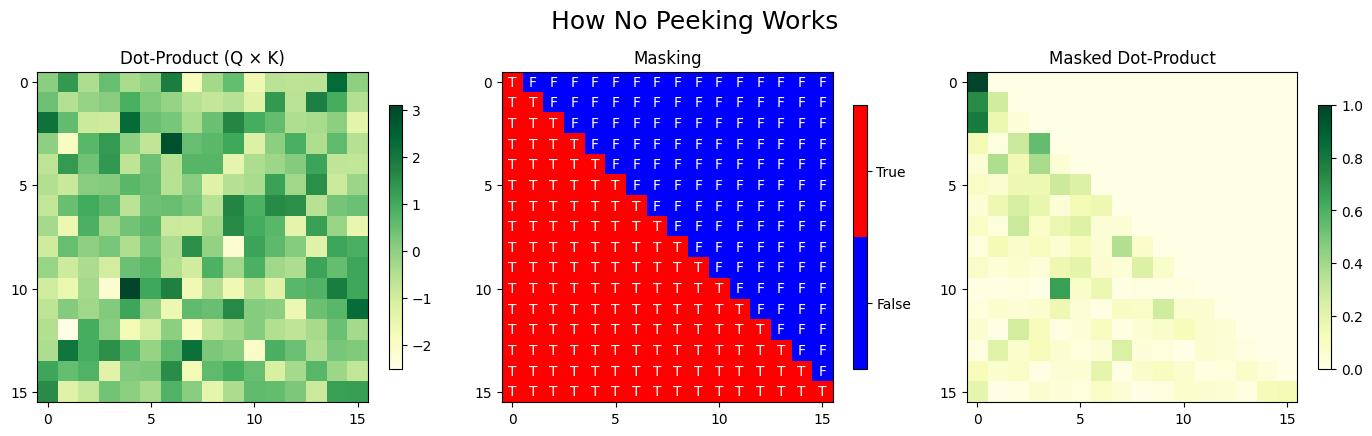

In [3]:
fig, axes = plt.subplots(1,3, figsize=(14, 4))

fig.suptitle('How No Peeking Works', fontsize=18, y=1.02)

### ax1
scores = torch.randn(16, 8, seq_len, seq_len) # batch_size, head_count, seq_len, seq_len
data   = scores[0][0]

ax   = axes[0]
ax.imshow(data, cmap='YlGn')  
ax.set_xticks(range(0, seq_len, 5))  
ax.set_yticks(range(0, seq_len, 5))  

# Add color bar with labels
mpbl = ax.get_children()[0] # get the mappable 
cbar = plt.colorbar(mappable=mpbl, ax=ax, shrink=0.8)

ax.set_title("Dot-Product (Q × K)")

### ax2
mask = nopeek_mask(seq_len).unsqueeze(1) # 1, 1, seq_len, seq_len 
data = mask[0][0]

ax = axes[1]
ax.imshow(data, cmap=ListedColormap(['b', 'r']))
ax.set_xticks(range(0, seq_len, 5))
ax.set_yticks(range(0, seq_len, 5))

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, 'T' if data[i, j] else 'F',
                       ha="center", va="center", 
                       color='w' if data[i, j] else 'w')

mpbl = ax.get_children()[0] # get the mappable 
cbar = plt.colorbar(mappable=mpbl, ax=ax, shrink=0.8)
cbar.set_ticks([0.25, 0.75])  # Midpoints for True and False
cbar.set_ticklabels(['False', 'True'])

ax.set_title("Masking")

### ax3
data = scores
data = data.masked_fill(mask == 0, -1e9)
data = torch.nn.functional.softmax(data, dim=-1)[0][0]  
ax   = axes[2] 
ax.imshow(data, cmap='YlGn')  
ax.set_xticks(range(0, seq_len, 5))  
ax.set_yticks(range(0, seq_len, 5))

mpbl = ax.get_children()[0] # get the mappable 
cbar = plt.colorbar(mappable=mpbl, ax=ax, shrink=0.8) 

ax.set_title("Masked Dot-Product")

fig.tight_layout()
fig.savefig('mask.png',bbox_inches='tight')
plt.show()